In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
%matplotlib inline


from glob import glob

In [18]:
all_q = {}
x_dirs = glob('yz/*/')

x_dirs[0].split('/')


'1qtable'.split('1')

['', 'qtable']

In [19]:
for x_dir in x_dirs:
    chain_length = x_dir.split('/')[1]
    qtables = glob(f'{x_dir}{chain_length}*')
    print(qtables)
    all_q[chain_length] = {}
    for qtable in qtables:
        spacing = qtable.split(f'{x_dir}{chain_length}')[1].split('qtable')[0]
        
        
        with open(qtable) as fp:
            #The first 14 lines of the qTable do not contain spectrum data
            print(qtable)
            for blank in range(0,14):
                fp.readline()
            wave = []
            Q_ext = []
            Q_abs = []
            Q_sca = []
            for k in range(350,801):
                line = fp.readline()
                ary = line.split(" ")
                ary = [a for a in ary if a]
#                 print(ary[1:5])
                ary = np.array(ary[1:5]).astype(np.float)
                wave.append(float(ary[0]))
                Q_ext.append(float(ary[1]))
                Q_abs.append(float(ary[2]))
                Q_sca.append(float(ary[3]))

                
            df = pd.DataFrame({'wave': wave, 'Q_ext': Q_ext, 'Q_abs': Q_abs, 'Q_sca': Q_sca})
            all_q[chain_length][spacing] = df

['yz/32/321qtable', 'yz/32/323qtable', 'yz/32/322qtable', 'yz/32/324qtable']
yz/32/321qtable
yz/32/323qtable
yz/32/322qtable
yz/32/324qtable
['yz/35/352qtable', 'yz/35/354qtable', 'yz/35/351qtable', 'yz/35/353qtable']
yz/35/352qtable
yz/35/354qtable
yz/35/351qtable
yz/35/353qtable
['yz/34/342qtable', 'yz/34/344qtable', 'yz/34/343qtable', 'yz/34/341qtable']
yz/34/342qtable
yz/34/344qtable
yz/34/343qtable
yz/34/341qtable
['yz/33/333qtable', 'yz/33/331qtable', 'yz/33/332qtable', 'yz/33/334qtable']
yz/33/333qtable
yz/33/331qtable
yz/33/332qtable
yz/33/334qtable
['yz/20/203qtable', 'yz/20/202qtable', 'yz/20/200qtable', 'yz/20/201qtable_NAN']
yz/20/203qtable
yz/20/202qtable
yz/20/200qtable
yz/20/201qtable_NAN
['yz/18/181qtable_NAN', 'yz/18/183qtable', 'yz/18/180qtable', 'yz/18/182qtable']
yz/18/181qtable_NAN
yz/18/183qtable
yz/18/180qtable
yz/18/182qtable
['yz/27/274qtable', 'yz/27/271qtable', 'yz/27/273qtable', 'yz/27/272qtable_NAN']
yz/27/274qtable
yz/27/271qtable
yz/27/273qtable
yz/27/272

In [20]:
from scipy.interpolate import UnivariateSpline
unreg = all_q['24']['1'].dropna()
spl = UnivariateSpline(unreg['wave'], unreg['Q_ext'])

wl = np.arange(0.350, 0.800, 0.001)
# inp = ((wl - w_mean)/w_std).reshape(-1, 1)

spl.set_smoothing_factor(0.00001)
preds = spl(wl) 

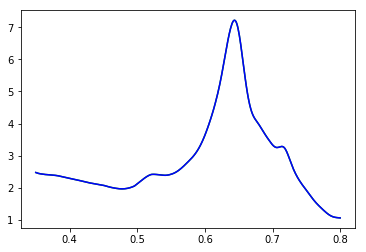

In [21]:
plt.plot(all_q['24']['1']['wave'], all_q['24']['1']['Q_ext'], 'g')
plt.plot(wl, preds, 'b')

In [22]:
all_q['24']['1'].loc[all_q['24']['1']['Q_ext'].isnull(), 'Q_ext'] 

Series([], Name: Q_ext, dtype: float64)

In [23]:
preds[all_q['24']['1']['Q_ext'].isnull()]

array([], dtype=float64)

In [24]:
for n in all_q:
    for spacing in all_q[n]:
        
        df = all_q[n][spacing]
        df_copy = df.dropna()
        spl = UnivariateSpline(np.array(df_copy['wave']), np.array(df_copy['Q_abs']))
        wl = np.arange(0.350, 0.800, 0.001)
        spl.set_smoothing_factor(0.000001)
        preds = spl(wl) 

        df.loc[df['Q_ext'].isnull(), 'Q_ext'] = preds[df['Q_ext'].isnull()]
        
        all_q[n][spacing] = df

In [25]:
all_q['5']['1'][350:370]

,wave,Q_ext,Q_abs,Q_sca
350,0.700,0.843690,0.79483,0.048869
351,0.701,0.838730,0.79046,0.048292
352,0.702,0.834550,0.78680,0.047757
353,0.703,0.831110,0.78386,0.047262
354,0.704,0.828340,0.78155,0.046811
355,0.705,0.826150,0.77973,0.046428
356,0.706,0.778254,NaN,NaN
357,0.707,0.776874,NaN,NaN
358,0.708,0.775323,NaN,NaN
359,0.709,0.773334,NaN,NaN


In [26]:
df_list = {}
for n in all_q:
    n_list = []
    for spacing in all_q[n]:
        
        cp = all_q[n][spacing].copy()
        cp['spacing'] = float(spacing)
        n_list.append(cp)
    
    df = pd.concat(n_list, axis=0)
    df_list[n] = df
    
df_list['3'].head()

,wave,Q_ext,Q_abs,Q_sca,spacing
0,0.350,1.3033,1.2622,0.041116,3.0
1,0.351,1.2982,1.2576,0.040627,3.0
2,0.352,1.2933,1.2531,0.040158,3.0
3,0.353,1.2885,1.2489,0.039700,3.0
4,0.354,1.2840,1.2447,0.039265,3.0


In [27]:
formatted_df = {}

for n in df_list:
    df = df_list[n]
    new_df = pd.DataFrame()
    for space in [1.0, 2.0, 3.0, 4.0]:
        ser = df.loc[df['spacing'] == space, 'Q_ext']
        if not ser.empty:
            new_df[str(space)] = ser
        
    formatted_df[n] = new_df

In [28]:
df = df_list['5']
new_df = pd.DataFrame()
for space in [1.0, 2.0, 3.0, 4.0]:
    ser = df.loc[df['spacing'] == space, 'Q_ext']
    if not ser.empty:
        new_df[str(space)] = ser

In [29]:
df = formatted_df['5']
df[350:370]

,1.0,2.0,3.0
350,0.843690,0.42225,0.26708
351,0.838730,0.41847,0.26506
352,0.834550,0.41491,0.26319
353,0.831110,0.41154,0.26142
354,0.828340,0.40831,0.25974
355,0.826150,0.40515,0.25807
356,0.778254,0.40197,0.25638
357,0.776874,0.39871,0.25462
358,0.775323,0.39527,0.25275
359,0.773334,0.39158,0.25071


In [30]:
for i in range(0, 451):
    print(i)
    print(df.loc[i])

0
1.0    1.5301
2.0    1.5469
3.0    1.5482
Name: 0, dtype: float64
1
1.0    1.5249
2.0    1.5414
3.0    1.5425
Name: 1, dtype: float64
2
1.0    1.5199
2.0    1.5362
3.0    1.5371
Name: 2, dtype: float64
3
1.0    1.5151
2.0    1.5311
3.0    1.5319
Name: 3, dtype: float64
4
1.0    1.5106
2.0    1.5263
3.0    1.5268
Name: 4, dtype: float64
5
1.0    1.5075
2.0    1.5232
3.0    1.5237
Name: 5, dtype: float64
6
1.0    1.5050
2.0    1.5206
3.0    1.5211
Name: 6, dtype: float64
7
1.0    1.5026
2.0    1.5182
3.0    1.5187
Name: 7, dtype: float64
8
1.0    1.5003
2.0    1.5159
3.0    1.5164
Name: 8, dtype: float64
9
1.0    1.4982
2.0    1.5139
3.0    1.5143
Name: 9, dtype: float64
10
1.0    1.4962
2.0    1.5119
3.0    1.5124
Name: 10, dtype: float64
11
1.0    1.4944
2.0    1.5101
3.0    1.5106
Name: 11, dtype: float64
12
1.0    1.4927
2.0    1.5085
3.0    1.5089
Name: 12, dtype: float64
13
1.0    1.4911
2.0    1.5070
3.0    1.5075
Name: 13, dtype: float64
14
1.0    1.4897
2.0    1.5057
3.0    1.

Name: 186, dtype: float64
187
1.0    1.7409
2.0    1.9983
3.0    2.2278
Name: 187, dtype: float64
188
1.0    1.7430
2.0    2.0077
3.0    2.2430
Name: 188, dtype: float64
189
1.0    1.7454
2.0    2.0174
3.0    2.2586
Name: 189, dtype: float64
190
1.0    1.7480
2.0    2.0276
3.0    2.2744
Name: 190, dtype: float64
191
1.0    1.7510
2.0    2.0381
3.0    2.2906
Name: 191, dtype: float64
192
1.0    1.7544
2.0    2.0492
3.0    2.3071
Name: 192, dtype: float64
193
1.0    1.7583
2.0    2.0608
3.0    2.3240
Name: 193, dtype: float64
194
1.0    1.7627
2.0    2.0729
3.0    2.3412
Name: 194, dtype: float64
195
1.0    1.7677
2.0    2.0856
3.0    2.3586
Name: 195, dtype: float64
196
1.0    1.7733
2.0    2.0990
3.0    2.3763
Name: 196, dtype: float64
197
1.0    1.7796
2.0    2.1129
3.0    2.3941
Name: 197, dtype: float64
198
1.0    1.7865
2.0    2.1275
3.0    2.4121
Name: 198, dtype: float64
199
1.0    1.7939
2.0    2.1425
3.0    2.4304
Name: 199, dtype: float64
200
1.0    1.8014
2.0    2.1579
3.0   

Name: 334, dtype: float64
335
1.0    0.96341
2.0    0.52640
3.0    0.32442
Name: 335, dtype: float64
336
1.0    0.95365
2.0    0.51517
3.0    0.31817
Name: 336, dtype: float64
337
1.0    0.94417
2.0    0.50465
3.0    0.31236
Name: 337, dtype: float64
338
1.0    0.93499
2.0    0.49490
3.0    0.30699
Name: 338, dtype: float64
339
1.0    0.92608
2.0    0.48591
3.0    0.30204
Name: 339, dtype: float64
340
1.0    0.91745
2.0    0.47765
3.0    0.29751
Name: 340, dtype: float64
341
1.0    0.90906
2.0    0.47008
3.0    0.29334
Name: 341, dtype: float64
342
1.0    0.90085
2.0    0.46312
3.0    0.28951
Name: 342, dtype: float64
343
1.0    0.89281
2.0    0.45670
3.0    0.28598
Name: 343, dtype: float64
344
1.0    0.88491
2.0    0.45076
3.0    0.28269
Name: 344, dtype: float64
345
1.0    0.87719
2.0    0.44522
3.0    0.27963
Name: 345, dtype: float64
346
1.0    0.86967
2.0    0.44003
3.0    0.27677
Name: 346, dtype: float64
347
1.0    0.86245
2.0    0.43517
3.0    0.27409
Name: 347, dtype: float64

In [31]:
from scipy import interpolate
x = {}

for n in range(2,36):
    df = formatted_df[str(n)]
    
    y = []
    print(n)
    for i in range(0, 451):
        columns = np.array(df.columns).astype(np.float)
        vals = np.array(df.loc[i])
        f = interpolate.interp1d(columns, vals, kind='quadratic', fill_value='extrapolate')
        df_out = f(np.arange(0.8, 4.05, 0.05))
        y.append(df_out)
        
    y = np.array(y)
    x[n] = y

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


In [32]:
def mapper(inp):
    return '%.2f' % (0.8 + 0.05 * float(inp))

final = {}

for n in x:
    d = pd.DataFrame(x[n])
    d = d.rename(columns=mapper)
    wl_df = pd.DataFrame({'wl':np.arange(.350, .800, .001)})
    out = wl_df.join(d)
    print(out)
    out.to_csv(f'yz_{n}_new_interp.csv')

        wl      0.80      0.85      0.90      0.95      1.00      1.05  \
0    0.350  1.128704  1.128665  1.128618  1.128563  1.128500  1.128428   
1    0.351  1.124236  1.124189  1.124134  1.124071  1.124000  1.123921   
2    0.352  1.119956  1.119904  1.119844  1.119776  1.119700  1.119616   
3    0.353  1.115756  1.115704  1.115644  1.115576  1.115500  1.115416   
4    0.354  1.111788  1.111728  1.111659  1.111584  1.111500  1.111409   
..     ...       ...       ...       ...       ...       ...       ...   
446  0.796  0.081425  0.080080  0.078761  0.077469  0.076204  0.074965   
447  0.797  0.081491  0.080123  0.078782  0.077469  0.076183  0.074925   
448  0.798  0.081549  0.080158  0.078796  0.077462  0.076156  0.074878   
449  0.799  0.081588  0.080176  0.078793  0.077439  0.076114  0.074818   
450  0.800  0.081603  0.080171  0.078769  0.077396  0.076054  0.074741   

         1.10      1.15      1.20  ...      3.55      3.60      3.65  \
0    1.128349  1.128260  1.128164  ... 

        wl      0.80      0.85      0.90      0.95     1.00      1.05  \
0    0.350  1.807028  1.809456  1.811827  1.814142  1.81640  1.818602   
1    0.351  1.801552  1.803948  1.806288  1.808572  1.81080  1.812972   
2    0.352  1.796144  1.798517  1.800833  1.803095  1.80530  1.807450   
3    0.353  1.791036  1.793385  1.795679  1.797917  1.80010  1.802227   
4    0.354  1.785996  1.788330  1.790609  1.792832  1.79500  1.797112   
..     ...       ...       ...       ...       ...      ...       ...   
446  0.796  0.603718  0.584767  0.566240  0.548138  0.53046  0.513206   
447  0.797  0.603981  0.584880  0.566210  0.547970  0.53016  0.512780   
448  0.798  0.604200  0.584954  0.566143  0.547769  0.52983  0.512327   
449  0.799  0.604260  0.584878  0.565937  0.547438  0.52938  0.511764   
450  0.800  0.604080  0.584578  0.565522  0.546913  0.52875  0.511033   

         1.10      1.15      1.20  ...      3.55      3.60      3.65  \
0    1.820747  1.822836  1.824868  ...  1.856652  1

        wl      0.80      0.85      0.90      0.95     1.00      1.05  \
0    0.350  2.161228  2.164682  2.168062  2.171368  2.17460  2.177758   
1    0.351  2.154628  2.158057  2.161412  2.164693  2.16790  2.171033   
2    0.352  2.148252  2.151649  2.154973  2.158223  2.16140  2.164503   
3    0.353  2.142164  2.145533  2.148828  2.152051  2.15520  2.158276   
4    0.354  2.136288  2.139625  2.142889  2.146081  2.14920  2.152246   
..     ...       ...       ...       ...       ...      ...       ...   
446  0.796  0.959531  0.928078  0.897335  0.867302  0.83798  0.809368   
447  0.797  0.959015  0.927379  0.896462  0.866262  0.83678  0.808016   
448  0.798  0.958530  0.926709  0.895613  0.865244  0.83560  0.806682   
449  0.799  0.957934  0.925938  0.894675  0.864146  0.83435  0.805287   
450  0.800  0.957052  0.924899  0.893485  0.862812  0.83288  0.803688   

         1.10      1.15      1.20  ...      3.55      3.60      3.65  \
0    2.180842  2.183852  2.186788  ...  2.241308  2

        wl      0.80      0.85      0.90      0.95    1.00      1.05  \
0    0.350  2.392690  2.396752  2.400725  2.404607  2.4084  2.412103   
1    0.351  2.385370  2.389413  2.393365  2.397228  2.4010  2.404682   
2    0.352  2.378502  2.382511  2.386431  2.390260  2.3940  2.397650   
3    0.353  2.371848  2.375820  2.379703  2.383496  2.3872  2.390814   
4    0.354  2.365462  2.369405  2.373259  2.377024  2.3807  2.384287   
..     ...       ...       ...       ...       ...     ...       ...   
446  0.796  1.174980  1.134899  1.095792  1.057659  1.0205  0.984315   
447  0.797  1.174018  1.133711  1.094389  1.056052  1.0187  0.982333   
448  0.798  1.173172  1.132635  1.093094  1.054549  1.0170  0.980447   
449  0.799  1.172187  1.131431  1.091681  1.052937  1.0152  0.978469   
450  0.800  1.170930  1.129973  1.090032  1.051108  1.0132  0.976308   

         1.10      1.15      1.20  ...      3.55      3.60      3.65  \
0    2.415716  2.419240  2.422673  ...  2.493868  2.494074  2.4

        wl      0.80      0.85      0.90      0.95    1.00      1.05  \
0    0.350  2.586576  2.591131  2.595587  2.599944  2.6042  2.608357   
1    0.351  2.578708  2.583230  2.587653  2.591976  2.5962  2.600324   
2    0.352  2.571222  2.575716  2.580110  2.584405  2.5886  2.592696   
3    0.353  2.564104  2.568551  2.572899  2.577149  2.5813  2.585352   
4    0.354  2.557118  2.561536  2.565856  2.570077  2.5742  2.578225   
..     ...       ...       ...       ...       ...     ...       ...   
446  0.796  1.334141  1.288414  1.243799  1.200294  1.1579  1.116617   
447  0.797  1.332834  1.286866  1.242021  1.198299  1.1557  1.114224   
448  0.798  1.331649  1.285434  1.240355  1.196410  1.1536  1.111925   
449  0.799  1.330452  1.283994  1.238683  1.194518  1.1515  1.109628   
450  0.800  1.328847  1.282174  1.236658  1.192301  1.1491  1.107057   

         1.10      1.15      1.20  ...      3.55      3.60      3.65  \
0    2.612414  2.616372  2.620229  ...  2.701325  2.701588  2.7

        wl      0.80      0.85      0.90      0.95    1.00      1.05  \
0    0.350  2.755216  2.760121  2.764921  2.769614  2.7742  2.778680   
1    0.351  2.746966  2.751834  2.756595  2.761251  2.7658  2.770243   
2    0.352  2.739116  2.743946  2.748670  2.753288  2.7578  2.762206   
3    0.353  2.731430  2.736232  2.740927  2.745517  2.7500  2.754377   
4    0.354  2.724164  2.728932  2.733593  2.738150  2.7426  2.746945   
..     ...       ...       ...       ...       ...     ...       ...   
446  0.796  1.462286  1.412033  1.363001  1.315190  1.2686  1.223231   
447  0.797  1.460741  1.410230  1.360953  1.312910  1.2661  1.220524   
448  0.798  1.459447  1.408665  1.359130  1.310842  1.2638  1.218005   
449  0.799  1.457998  1.406960  1.357180  1.308660  1.2614  1.215399   
450  0.800  1.456285  1.405007  1.355000  1.306264  1.2588  1.212608   

         1.10      1.15      1.20  ...      3.55      3.60      3.65  \
0    2.783054  2.787322  2.791483  ...  2.880050  2.880368  2.8

In [ ]:
from scipy.interpolate import BivariateSpline
from scipy import interpolate


ones = df_list[0][df_list[0]['spacing'] == 1.0].dropna()
twos = df_list[0][df_list[0]['spacing'] == 2.0]
threes = df_list[0][df_list[0]['spacing'] == 3.0]
fours = df_list[0][df_list[0]['spacing'] == 4.0]


# spl = BivariateSpline(ones['wave'], ones['spacing'], ones['Q_abs'], s=0.000001)


# tck = interpolate.bisplrep(ones['wave'], ones['spacing'], ones['Q_abs'], s=0.1)
# znew = interpolate.bisplev(ones['wave'], ones['spacing'], tck)

# wl = np.arange(0.350, 0.800, 0.001)

# preds = spl(ones['wave'], ones['spacing']) 
plt.plot(ones['wave'], ones['Q_abs'])
plt.plot(twos['wave'], twos['Q_abs'])
plt.plot(threes['wave'], threes['Q_abs'])
plt.plot(fours['wave'], fours['Q_abs'])


# plt.plot(ones['wave'], znew)

In [ ]:
spl = UnivariateSpline([1.0, 2.0, 3.0, 4.0], [ones['Q_abs'][180], twos['Q_abs'][180], threes['Q_abs'][180], fours['Q_abs'][180]])

In [ ]:
spl.set_smoothing_factor(0.01)
plt.plot([1.0, 2.0, 3.0, 4.0], [ones['Q_abs'][180], twos['Q_abs'][180], threes['Q_abs'][180], fours['Q_abs'][180]])
plt.plot([1.0, 2.0, 3.0, 4.0], [spl(1.0), spl(2.0), spl(3.0), spl(4.0)])

In [ ]:
df_list[0]